In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pathlib
import itertools

In [2]:
small_graphs_feats_path = pathlib.Path('./data/small_graphs_new_feats_merge.csv')

In [3]:
feats_df = pd.read_csv(small_graphs_feats_path)

In [4]:
feats_df.head()

city_name  city_id  streets_per_node_avg  node_density_km  \
0  6th of october     3881              3.074547       134.838226   
1             9th     4032              3.123626        50.469652   
2          aachen     2245              2.656357        99.808709   
3         aalborg     2486              2.547955       143.889085   
4          aarhus     2518              2.620561       141.914403   

   intersection_density_km  edge_density_km  street_density_km  \
0               129.955905     29758.680898       22894.690589   
1                49.637735     21212.274383       19026.130382   
2                78.028727     30088.459591       17058.828775   
3               101.025472     33429.217757       19072.796647   
4               104.059823     33875.790251       19395.066465   

   1way_int_count  2way_int_count  3way_int_count  ...  11way_int_prop  \
0             136               5            3061  ...             NaN   
1               6               1             299  ...             NaN   
2             896              89            2670  ...             NaN   
3            1202              31            2240  ...             NaN   
4            1645              57            3536  ...             NaN   

   12way_int_prop  13way_int_count  14way_int_count  15way_int_count  \
0             NaN              NaN              NaN              NaN   
1             NaN              NaN              NaN              NaN   
2             NaN              NaN              NaN              NaN   
3             NaN              NaN              NaN              NaN   
4             NaN              NaN              NaN              NaN   

   16way_int_count  13way_int_prop  14way_int_prop  15way_int_prop  \
0              NaN             NaN             NaN             NaN   
1              NaN             NaN             NaN             NaN   
2              NaN             NaN             NaN             NaN   
3              NaN             NaN             NaN             NaN   
4              NaN             NaN             NaN             NaN   

   16way_int_prop  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  

[5 rows x 39 columns]

# Juntando com indicadores originais

In [5]:
indicators_path = pathlib.Path('./data/indicators.csv')
indicators_df = pd.read_csv(indicators_path)

In [6]:
indicators_df.head()

country country_iso   core_city  uc_id  cc_avg_dir  cc_avg_undir  \
0       indonesia         IDN       wates  12375    0.036690      0.038630   
1          brazil         BRA  taquaralto   1186    0.024520      0.035016   
2           china         CHN     xinqiao  12218    0.036481      0.045724   
3        colombia         COL       yopal    687    0.016110      0.019414   
4  czech_republic         CZE      pilsen   2886    0.032913      0.044298   

   cc_wt_avg_dir  cc_wt_avg_undir  circuity  elev_iqr  ...  prop_3way  \
0       0.004276         0.004359  1.065403      11.0  ...   0.743653   
1       0.001195         0.001439  1.008276      18.0  ...   0.589312   
2       0.001608         0.001723  1.016544       2.0  ...   0.486911   
3       0.001072         0.001221  1.011106      16.0  ...   0.583149   
4       0.001418         0.001758  1.047311      24.0  ...   0.536906   

   prop_deadend  self_loop_proportion  straightness  \
0      0.171990              0.000619      0.938612   
1      0.043543              0.000000      0.991791   
2      0.125654              0.000000      0.983725   
3      0.056171              0.000460      0.989016   
4      0.250421              0.001013      0.954826   

                            uc_names                     world_region  \
0                              Wates                             Asia   
1                         Taquaralto  Latin America and the Caribbean   
2  Xinqiao; Jiepai; Baqiao; Houxiang                             Asia   
3                              Yopal  Latin America and the Caribbean   
4                             Pilsen                           Europe   

      world_subregion  resident_pop  area  built_up_area  
0  South-Eastern Asia        107046  28.0       4.717896  
1       South America         90077  20.0       9.620359  
2        Eastern Asia        104714  42.0      22.057976  
3       South America        167421  16.0       5.645732  
4      Eastern Europe        142248  53.0      28.124355  

[5 rows x 39 columns]

In [7]:
final_df = indicators_df.merge(feats_df, left_on='uc_id', right_on='city_id')
final_df.drop('city_id', axis=1, inplace=True)

In [8]:
final_df.describe().T

count         mean          std  min          25%  \
uc_id            8605.0  6379.841952  4170.760974  1.0  2490.000000   
cc_avg_dir       8605.0     0.033436     0.017267  0.0     0.023067   
cc_avg_undir     8605.0     0.040148     0.021210  0.0     0.026545   
cc_wt_avg_dir    8605.0     0.002138     0.003629  0.0     0.000898   
cc_wt_avg_undir  8605.0     0.002323     0.003680  0.0     0.001016   
...                 ...          ...          ...  ...          ...   
16way_int_count    20.0     0.050000     0.223607  0.0     0.000000   
13way_int_prop     40.0     0.000002     0.000011  0.0     0.000000   
14way_int_prop     40.0     0.000005     0.000035  0.0     0.000000   
15way_int_prop     20.0     0.000000     0.000000  0.0     0.000000   
16way_int_prop     20.0     0.000003     0.000015  0.0     0.000000   

                         50%           75%           max  
uc_id            6050.000000  10640.000000  13135.000000  
cc_avg_dir          0.031153      0.040891      0.333333  
cc_avg_undir        0.036323      0.049913      0.333333  
cc_wt_avg_dir       0.001472      0.002390      0.166229  
cc_wt_avg_undir     0.001654      0.002619      0.166229  
...                      ...           ...           ...  
16way_int_count     0.000000      0.000000      1.000000  
13way_int_prop      0.000000      0.000000      0.000067  
14way_int_prop      0.000000      0.000000      0.000219  
15way_int_prop      0.000000      0.000000      0.000000  
16way_int_prop      0.000000      0.000000      0.000067  

[70 rows x 8 columns]

## Coisas estranhas

Cidades sem nome:

In [9]:
final_df[final_df['city_name'] == 'unnamed']['country'].value_counts()

china                               166
india                                31
russia                               15
bangladesh                            6
sudan                                 4
pakistan                              4
north_korea                           2
thailand                              2
nigeria                               2
japan                                 2
iran                                  2
saudi_arabia                          2
tanzania                              1
uzbekistan                            1
myanmar                               1
democratic_republic_of_the_congo      1
south_korea                           1
kazakhstan                            1
kyrgyzstan                            1
egypt                                 1
zambia                                1
mozambique                            1
angola                                1
tajikistan                            1
Name: country, dtype: int64

## Correlações entre as variáveis

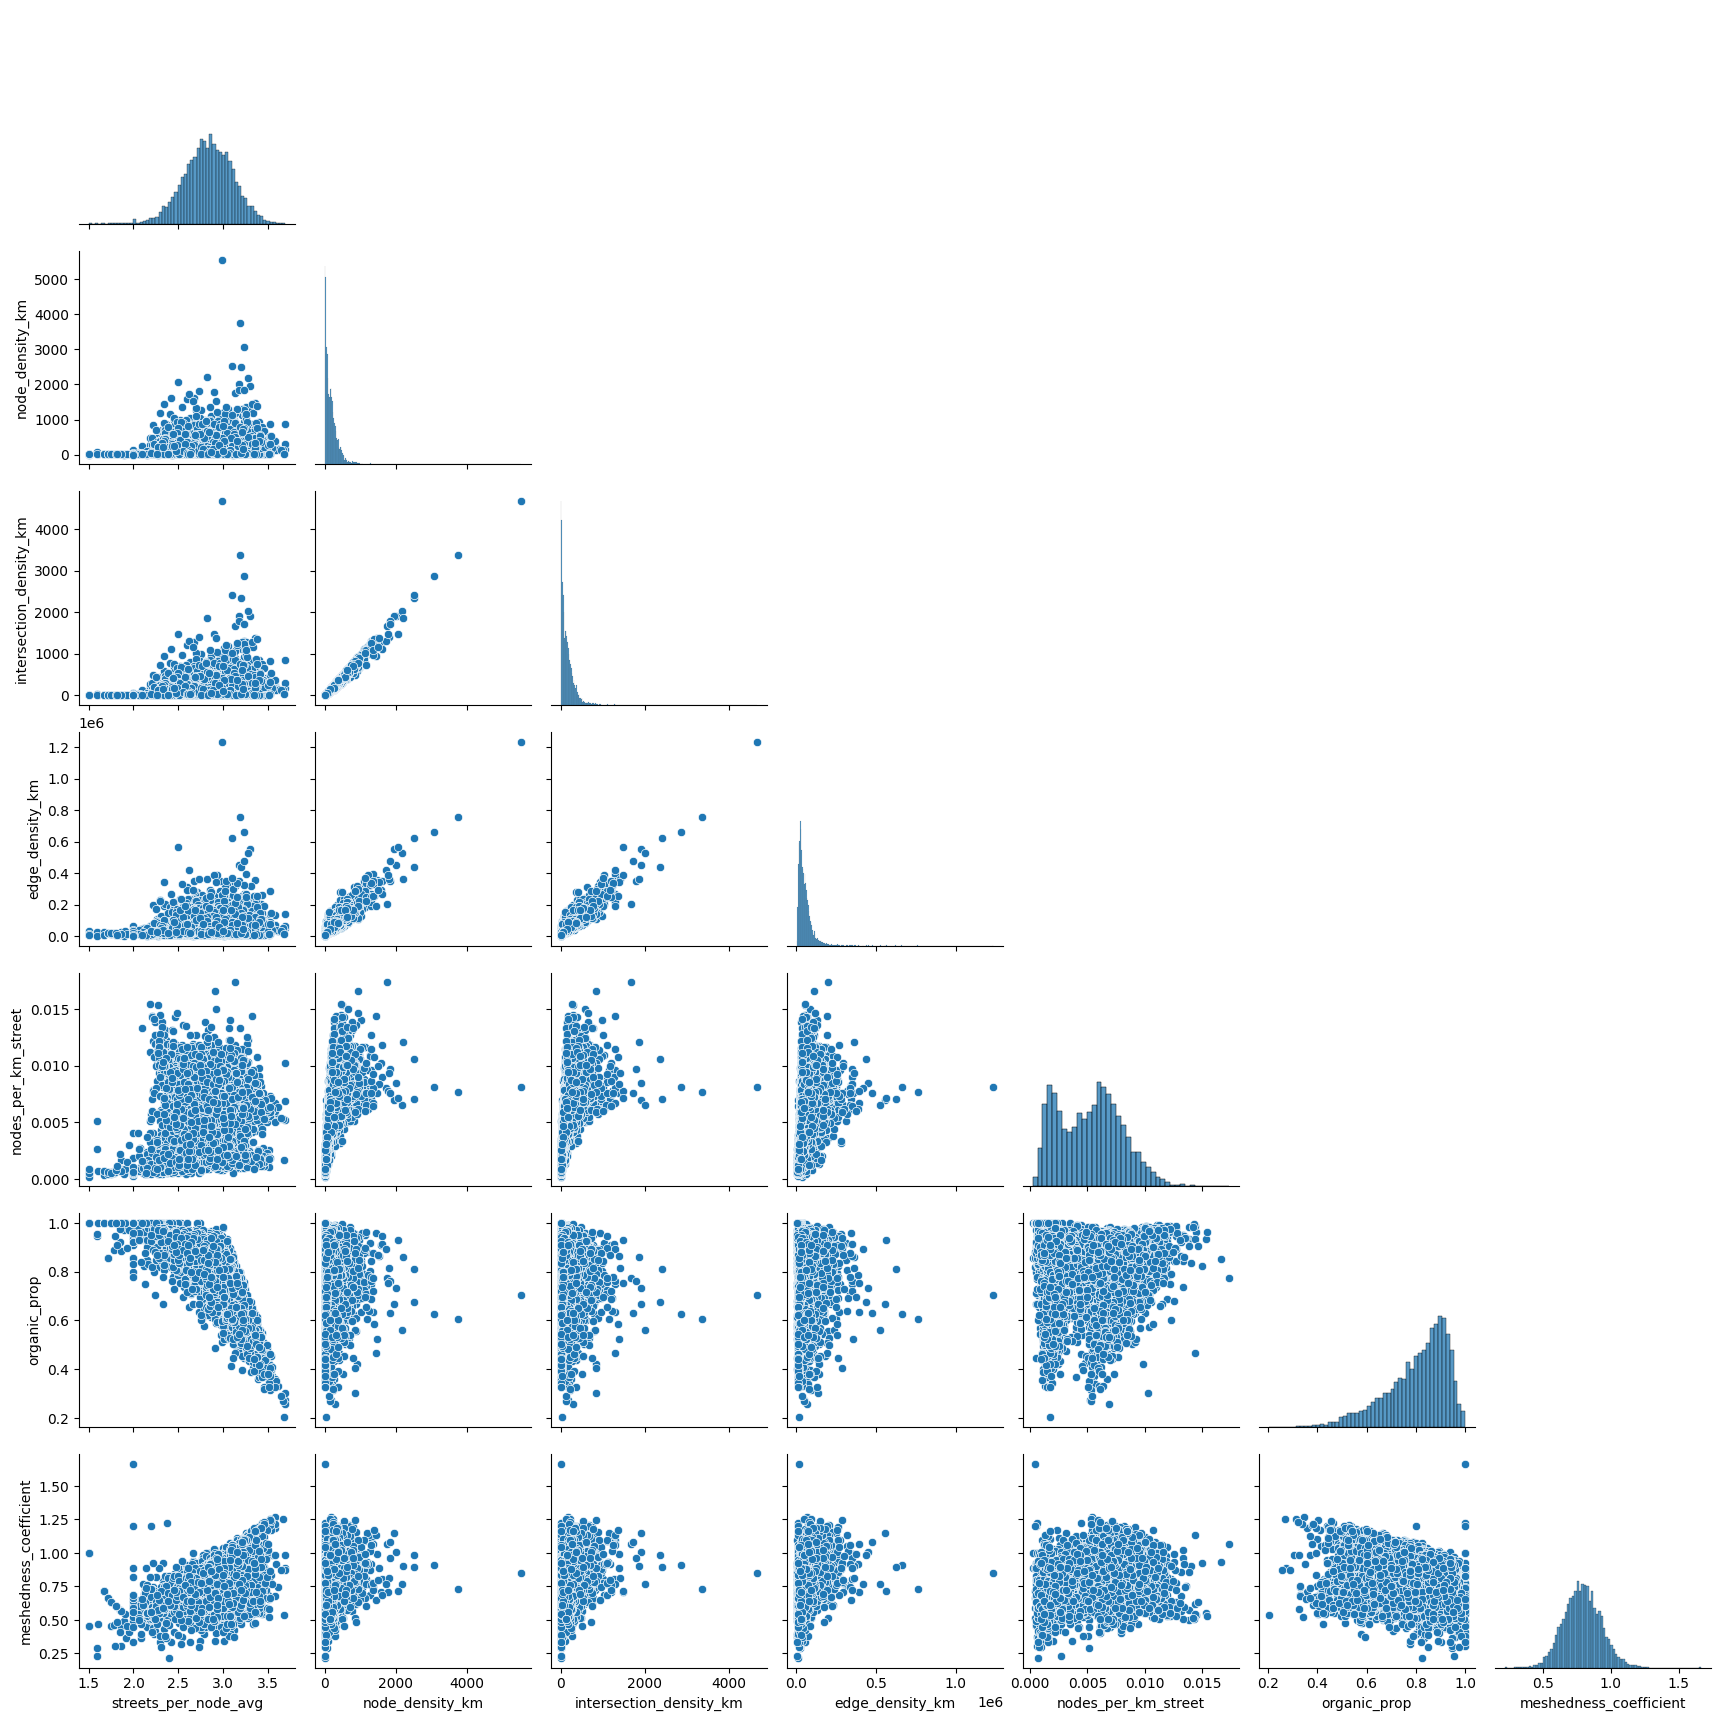

In [10]:
target_cols = ['streets_per_node_avg', 'node_density_km', 'intersection_density_km', 'edge_density_km',
              'nodes_per_km_street', 'organic_prop', 'meshedness_coefficient']
sns.pairplot(final_df[target_cols], corner=True)

Por variável:

- **streets_per_node**: Essa variável possui uma distribuição normal. Ela parece possuir uma correlação com **nodes_per_km_street**, o que é compreensível. Também possui uma boa correlação negativa com **organic_prop**, o que também faz sentido já que quanto maior o grau médio dos nós, mais indica que as ruas seguem um grid, o que diminui o **organic_prop**. Também possui uma certa correlação positiva com o **meshedness_coefficient**.
- **node_density_km**: Possui uma correlação positiva quase perfeita com **intersection_density_km**, o que é de se esperar e com **edge_density_km**. Lembrando que **intersection_density_km** não leva em consideração ruas sem saída, enquanto **edge_density_km** leva.
- **intersection_density_km**: Possui uma correlação positiva quase perfeita com **edge_density_km**, o que já era de se esperar.
- **edge_density_km**: Não possui uma correlação com as outras variáveis que sobraram. A sua relação com **organic_prop** indica que a maioria das cidades não possui uma alta densidade de arestas e isso não influencia na proporção orgânica. Isso poderia ser óbvio já que na conta de **organic_prop** não é levado em consideração nenhuma densidade.
- **nodes_per_km_street**: Parece haver uma subdivisão em dois grupos de cidades com relação ao **organic_prop**
- **organic_prop**: Parece haver uma leve correlação negativa com o **meshedness_coefficient**, entretanto, existe muita variação.

## Sobre *organic_prop*

Text(0.5, 1.0, 'organic_prop dist')

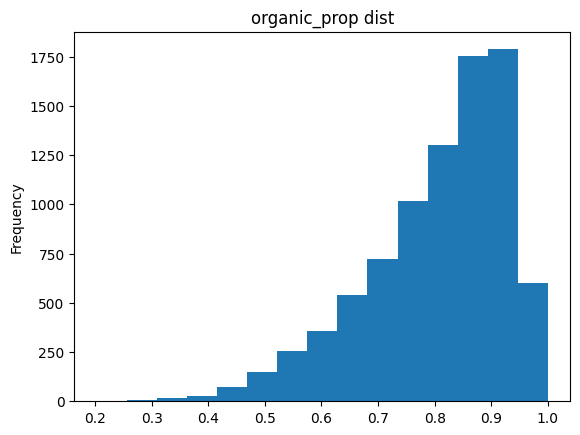

In [11]:
final_df['organic_prop'].plot(kind='hist', bins=15)
plt.title('organic_prop dist')

Existem cidades com proporção orgânica perfeita igual a 1. Isso significa que pode-se esperar que essas cidades possuam somente ruas sem saída ou intersecções em T (cruzamento entre 3 ruas). Isso serve para indicar que essas cidades não sãp planejadas.

In [14]:
full_organic_cities = final_df[final_df['organic_prop'] == 1]

In [15]:
full_organic_cities[40:]

country country_iso      core_city  uc_id  \
4116                             india         IND          tanda   7309   
4275                             india         IND          ahore   6607   
4291                             india         IND        korutla   8038   
4514                           nigeria         NGA        akabuka   2470   
4734                             india         IND     laxmangarh   6721   
4745                           nigeria         NGA         ojaima   2490   
5075                             india         IND        nilanga   7650   
5080                             india         IND       partapur   6849   
5440                        bangladesh         BGD      bholarhat   9577   
5594                             india         IND          gumia   9226   
5604                             india         IND          banda   7705   
5657                             india         IND        unnamed   9188   
5707                             india         IND        unnamed   9658   
5709                             india         IND       palacode   8259   
5783                             india         IND        sherkot   7208   
6385                             india         IND        unnamed   7683   
6419                             china         CHN        unnamed  11450   
6620                             india         IND       karimpur   9697   
6757                             india         IND       mithapur   6369   
6843                             india         IND       shajapur   7241   
6973                             india         IND     chutmalpur   7001   
7088                             india         IND         mawana   7110   
7254                       north_korea         PRK      phyongsan  12297   
7277                             india         IND          balod   8484   
7307                             india         IND         digboi  10099   
7481                             india         IND   bethuadahari   9687   
7523                           nigeria         NGA          chafe   2496   
7754  democratic_republic_of_the_congo         COD       kikondja   3695   
7932                             india         IND        barwaha   7271   
8152                             india         IND  ganj_dundwara   7422   
8206                             india         IND         sonari  10087   
8222                             india         IND        seohara   7219   
8560                             china         CHN  gongchangling  11475   

      cc_avg_dir  cc_avg_undir  cc_wt_avg_dir  cc_wt_avg_undir  circuity  \
4116    0.000000      0.000000       0.000000         0.000000  1.006806   
4275    0.062500      0.062500       0.012125         0.012125  1.032861   
4291    0.100000      0.100000       0.007220         0.007220  1.091955   
4514    0.026316      0.026316       0.005555         0.005555  1.106129   
4734    0.000000      0.000000       0.000000         0.000000  1.046817   
4745    0.065152      0.090909       0.014752         0.015171  1.114881   
5075    0.000000      0.000000       0.000000         0.000000  1.049380   
5080    0.000000      0.000000       0.000000         0.000000  1.099313   
5440    0.050000      0.050000       0.006918         0.006918  1.095419   
5594    0.115942      0.115942       0.017432         0.017432  1.087386   
5604    0.000000      0.000000       0.000000         0.000000  1.062712   
5657    0.071429      0.071429       0.003965         0.003965  1.042640   
5707    0.000000      0.000000       0.000000         0.000000  1.010920   
5709    0.076923      0.076923       0.002233         0.002233  1.076499   
5783    0.050000      0.050000       0.006542         0.006542  1.087620   
6385    0.000000      0.000000       0.000000         0.000000  1.110715   
6419    0.000000      0.000000       0.000000         0.000000  1.140622   
6620    0.000000      0.000000       0.000000         0.000000  1.045738   
67

Por outro lado, existem algumas cidades com baixa proporção orgânica.

In [17]:
low_organic_cities = final_df[final_df['organic_prop'] < 0.5]

In [18]:
len(low_organic_cities)

177

In [22]:
final_df.columns

Index(['country', 'country_iso', 'core_city', 'uc_id', 'cc_avg_dir',
       'cc_avg_undir', 'cc_wt_avg_dir', 'cc_wt_avg_undir', 'circuity',
       'elev_iqr', 'elev_mean', 'elev_median', 'elev_range', 'elev_std',
       'grade_mean', 'grade_median', 'intersect_count',
       'intersect_count_clean', 'intersect_count_clean_topo', 'k_avg',
       'length_mean', 'length_median', 'length_total', 'street_segment_count',
       'node_count', 'orientation_entropy', 'orientation_order',
       'pagerank_max', 'prop_4way', 'prop_3way', 'prop_deadend',
       'self_loop_proportion', 'straightness', 'uc_names', 'world_region',
       'world_subregion', 'resident_pop', 'area', 'built_up_area', 'city_name',
       'streets_per_node_avg', 'node_density_km', 'intersection_density_km',
       'edge_density_km', 'street_density_km', '1way_int_count',
       '2way_int_count', '3way_int_count', '4way_int_count', '5way_int_count',
       '2way_int_prop', '5way_int_prop', 'nodes_per_km_street', 'organic_pr

In [73]:
target_num_cols = [
      'circuity', 'elev_mean', 'grade_mean', 'intersect_count', 
        'k_avg', 'length_mean', 'node_count', 'pagerank_max',
        'prop_4way', 'prop_3way', 'prop_deadend', 'self_loop_proportion',
        'straightness', 'resident_pop', 'area', 'built_up_area', 
        'streets_per_node_avg', 'node_density_km', 'intersection_density_km',
        'edge_density_km', 'street_density_km', 'nodes_per_km_street', 'organic_prop',
        'meshedness_coefficient'
    
]

target_cat_cols = [
    'world_region', 'world_subregion',
]

In [74]:
len(target_num_cols)

24

In [75]:
num_cols_groups = []
group_max_size = 6
for i in range(1,4):
    num_cols_groups.append(target_num_cols[(i-1)*group_max_size:i*group_max_size])

In [76]:
num_cols_groups

[['circuity',
  'elev_mean',
  'grade_mean',
  'intersect_count',
  'k_avg',
  'length_mean'],
 ['node_count',
  'pagerank_max',
  'prop_4way',
  'prop_3way',
  'prop_deadend',
  'self_loop_proportion'],
 ['straightness',
  'resident_pop',
  'area',
  'built_up_area',
  'streets_per_node_avg',
  'node_density_km']]

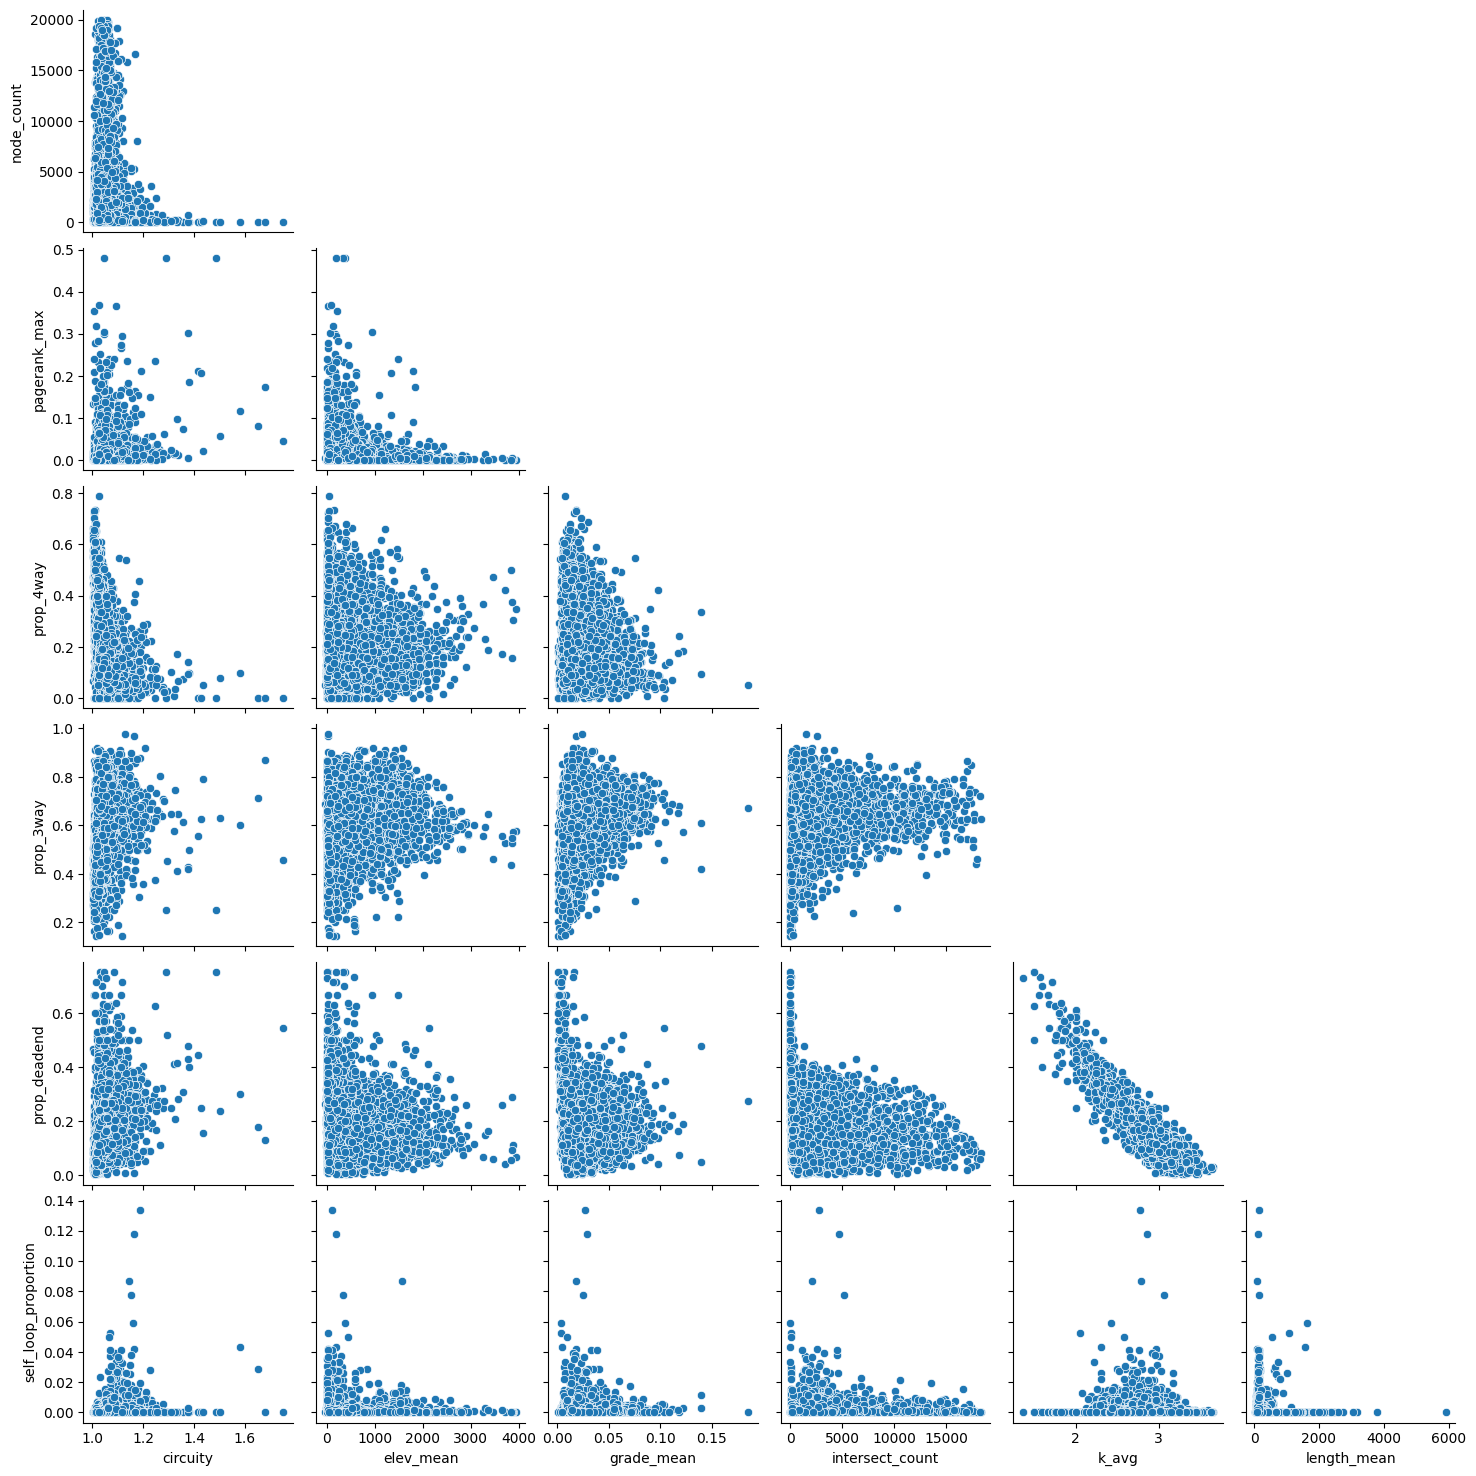

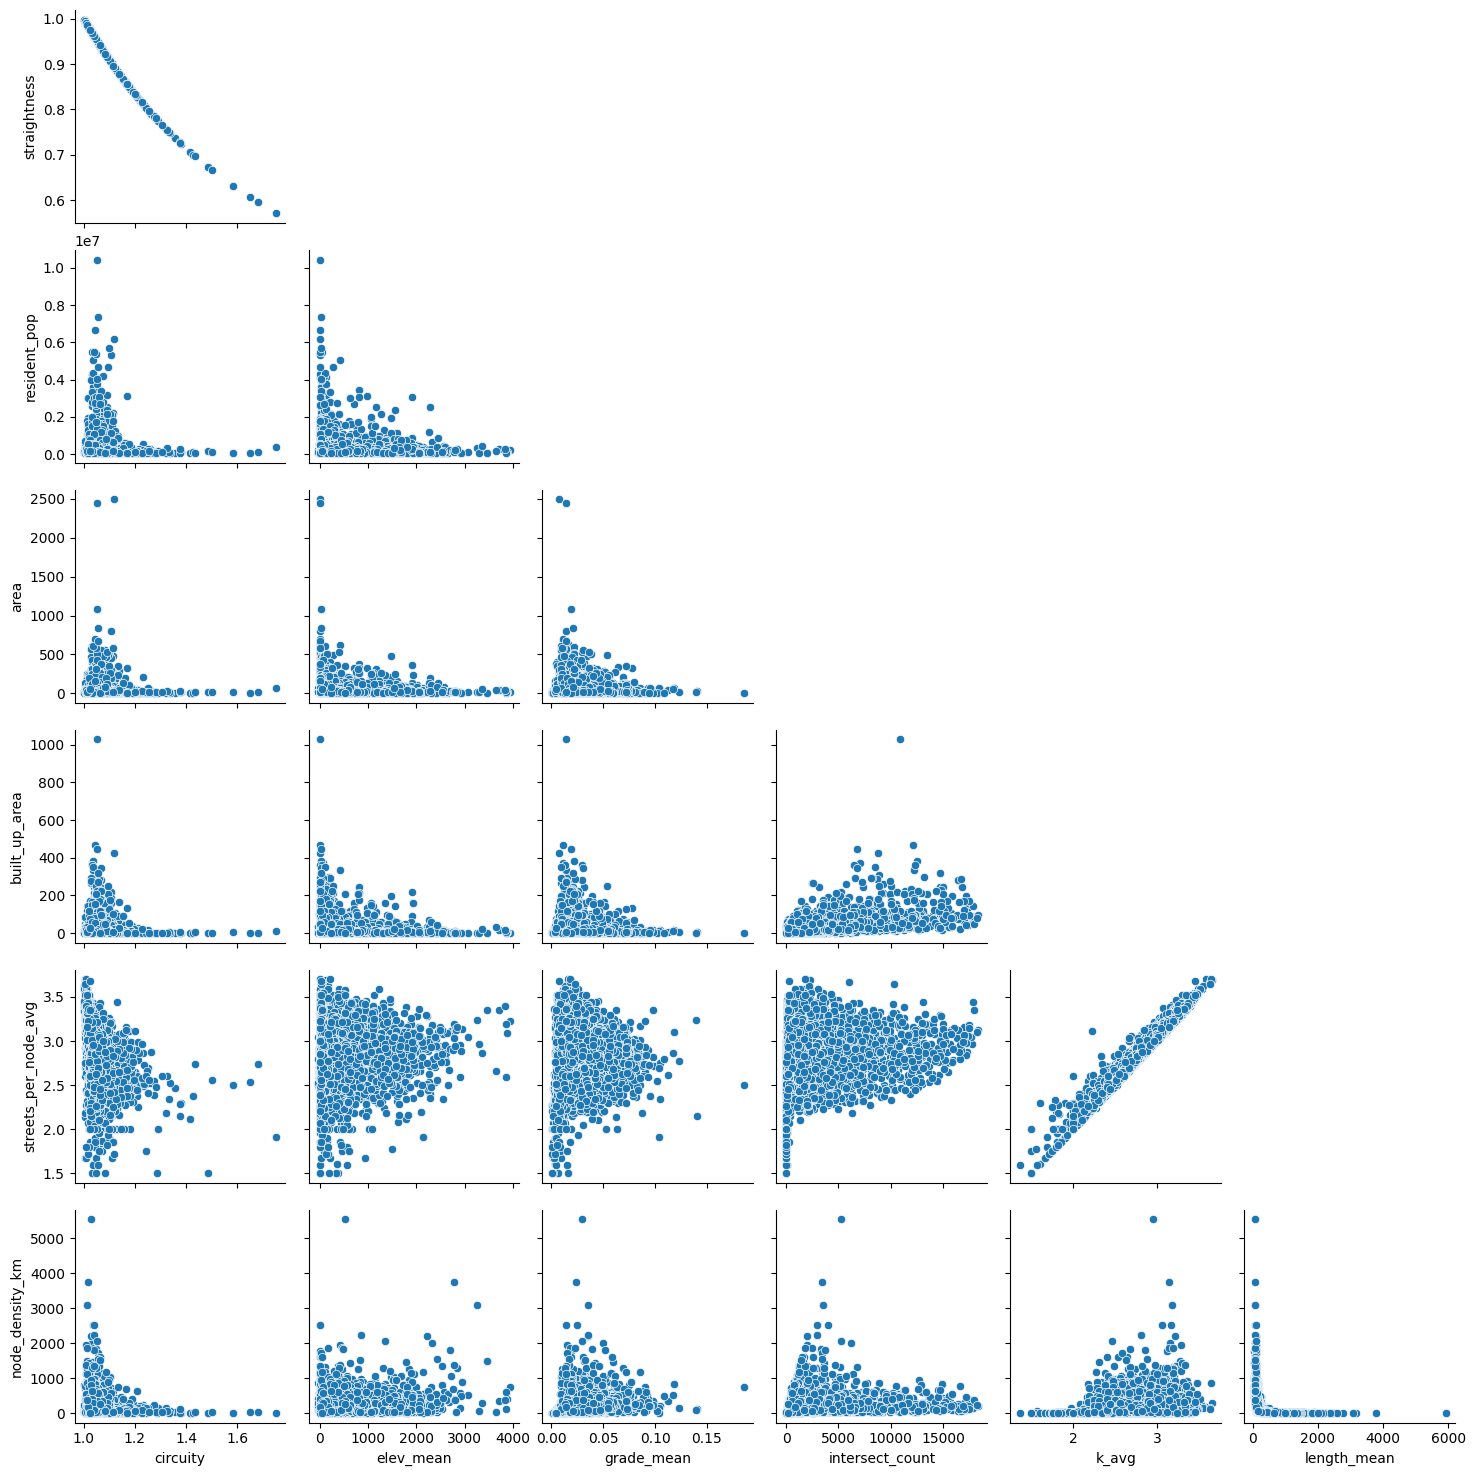

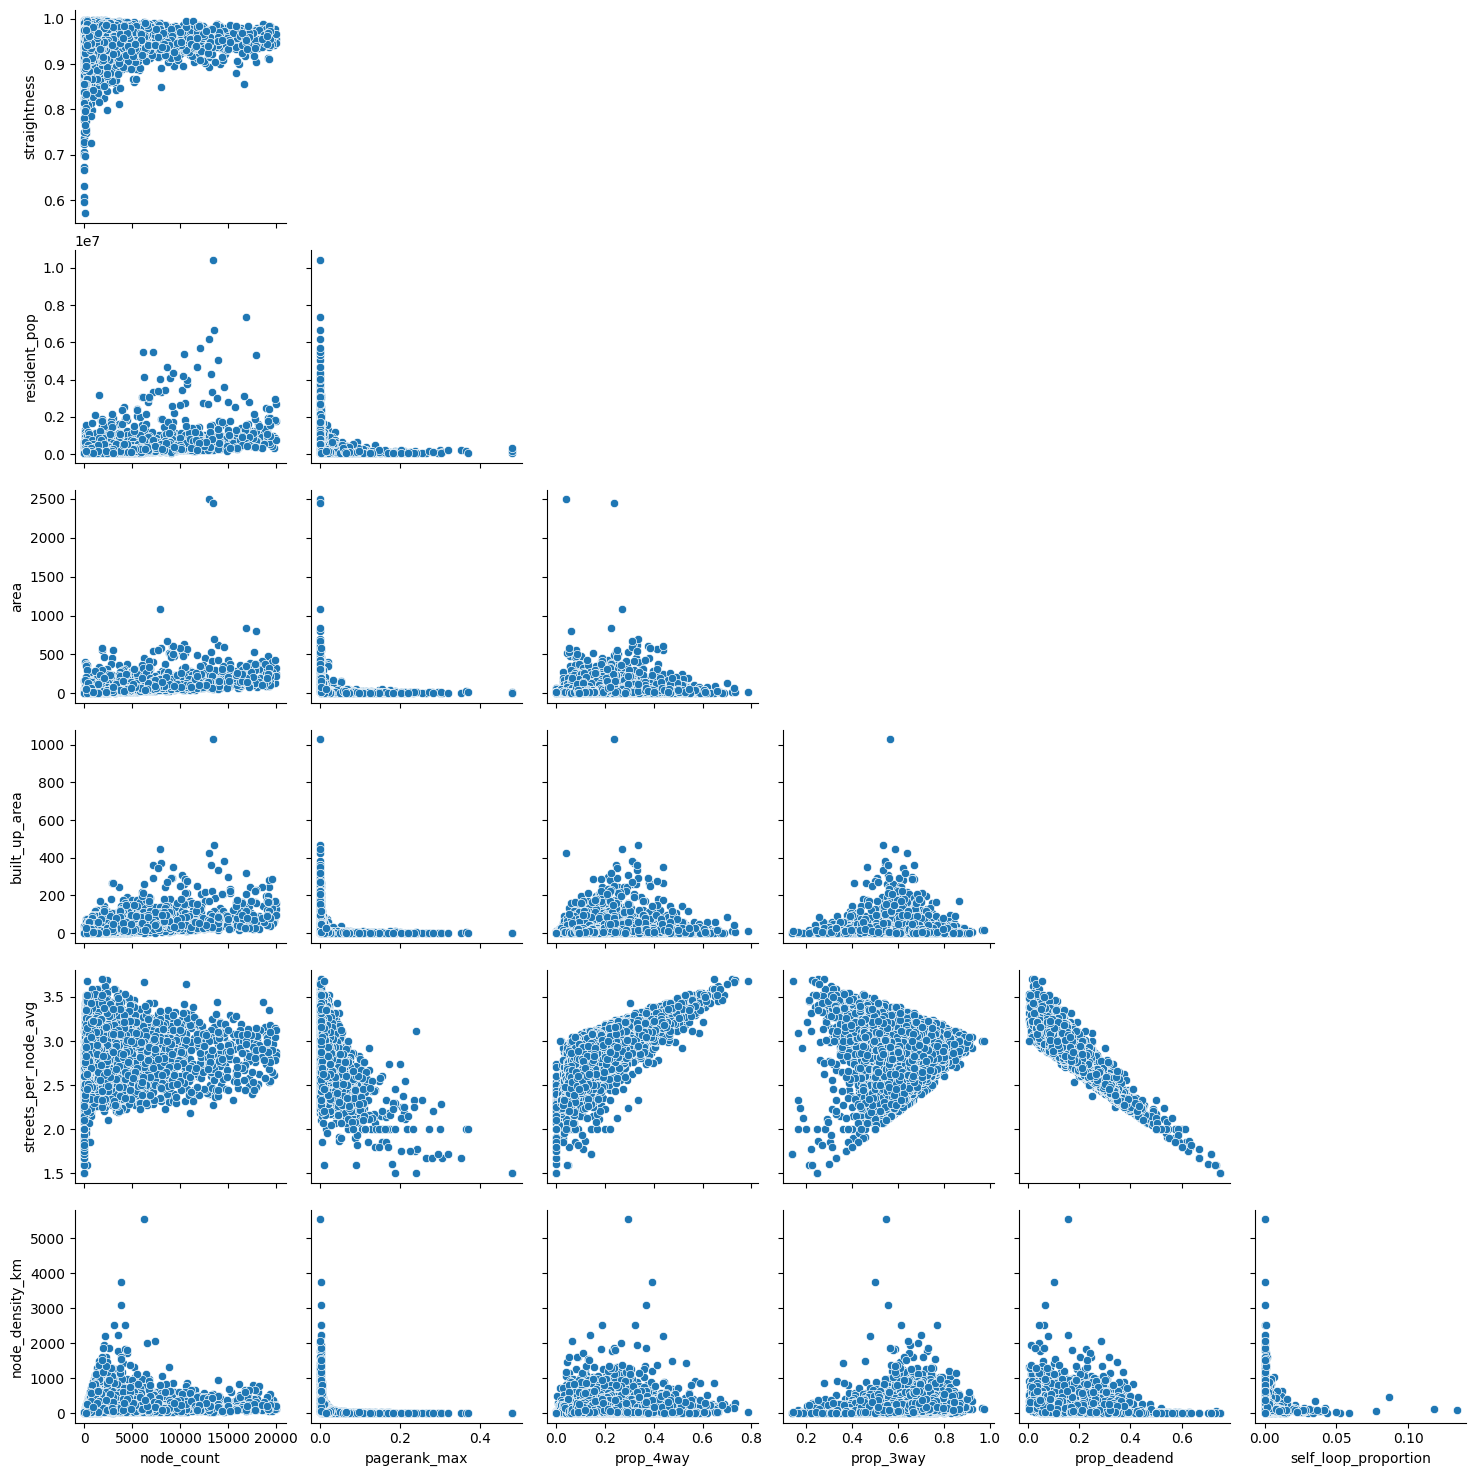

In [77]:
for subset in list(itertools.combinations(range(len(num_cols_groups)), 2)):
        first_group = num_cols_groups[subset[0]]
        second_group = num_cols_groups[subset[1]]
        
        sns.pairplot(final_df, x_vars=first_group, y_vars=second_group, corner=True)

In [40]:
def plot_all_against_num(target, num_cols, cat_cols, data, hue):
    num_cols_copy = num_cols.copy()
    if target in num_cols_copy:
        num_cols_copy.remove(target)
    for col in num_cols_copy:
        sns_plot = sns.relplot(data=data, x=target, y=col, hue=hue)
        # fig = plt.gcf()
        # plt.close(fig)
    
    for col in cat_cols:
        sns_plot = sns.catplot(data=data, x=col, y=target, hue=hue, kind="violin", inner="stick", split=True, palette="pastel")
        # fig = plt.gcf()
        # plt.close(fig)

### Distribuição de variáveis entre as orgânicas e não orgânicas

Definindo cidades como orgânicas ou não

In [19]:
final_df['organic'] = final_df['organic_prop'].apply(lambda x: x>0.5)

Text(0.5, 1.0, 'Non-organic cities per subregion of the world')

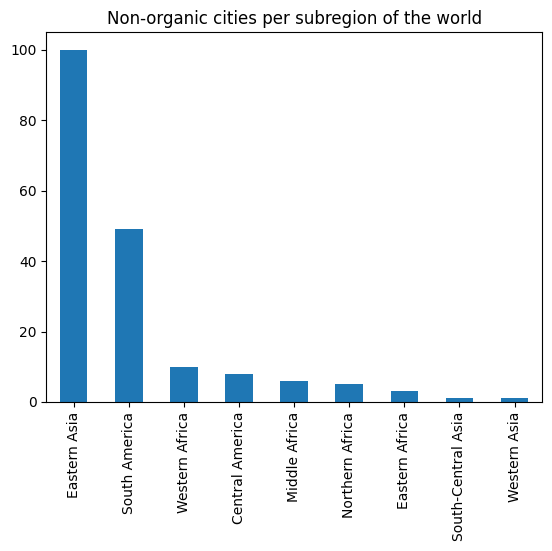

In [20]:
final_df[final_df['organic'] == False]['world_subregion'].value_counts().plot(kind='bar')
plt.title("Non-organic cities per subregion of the world")

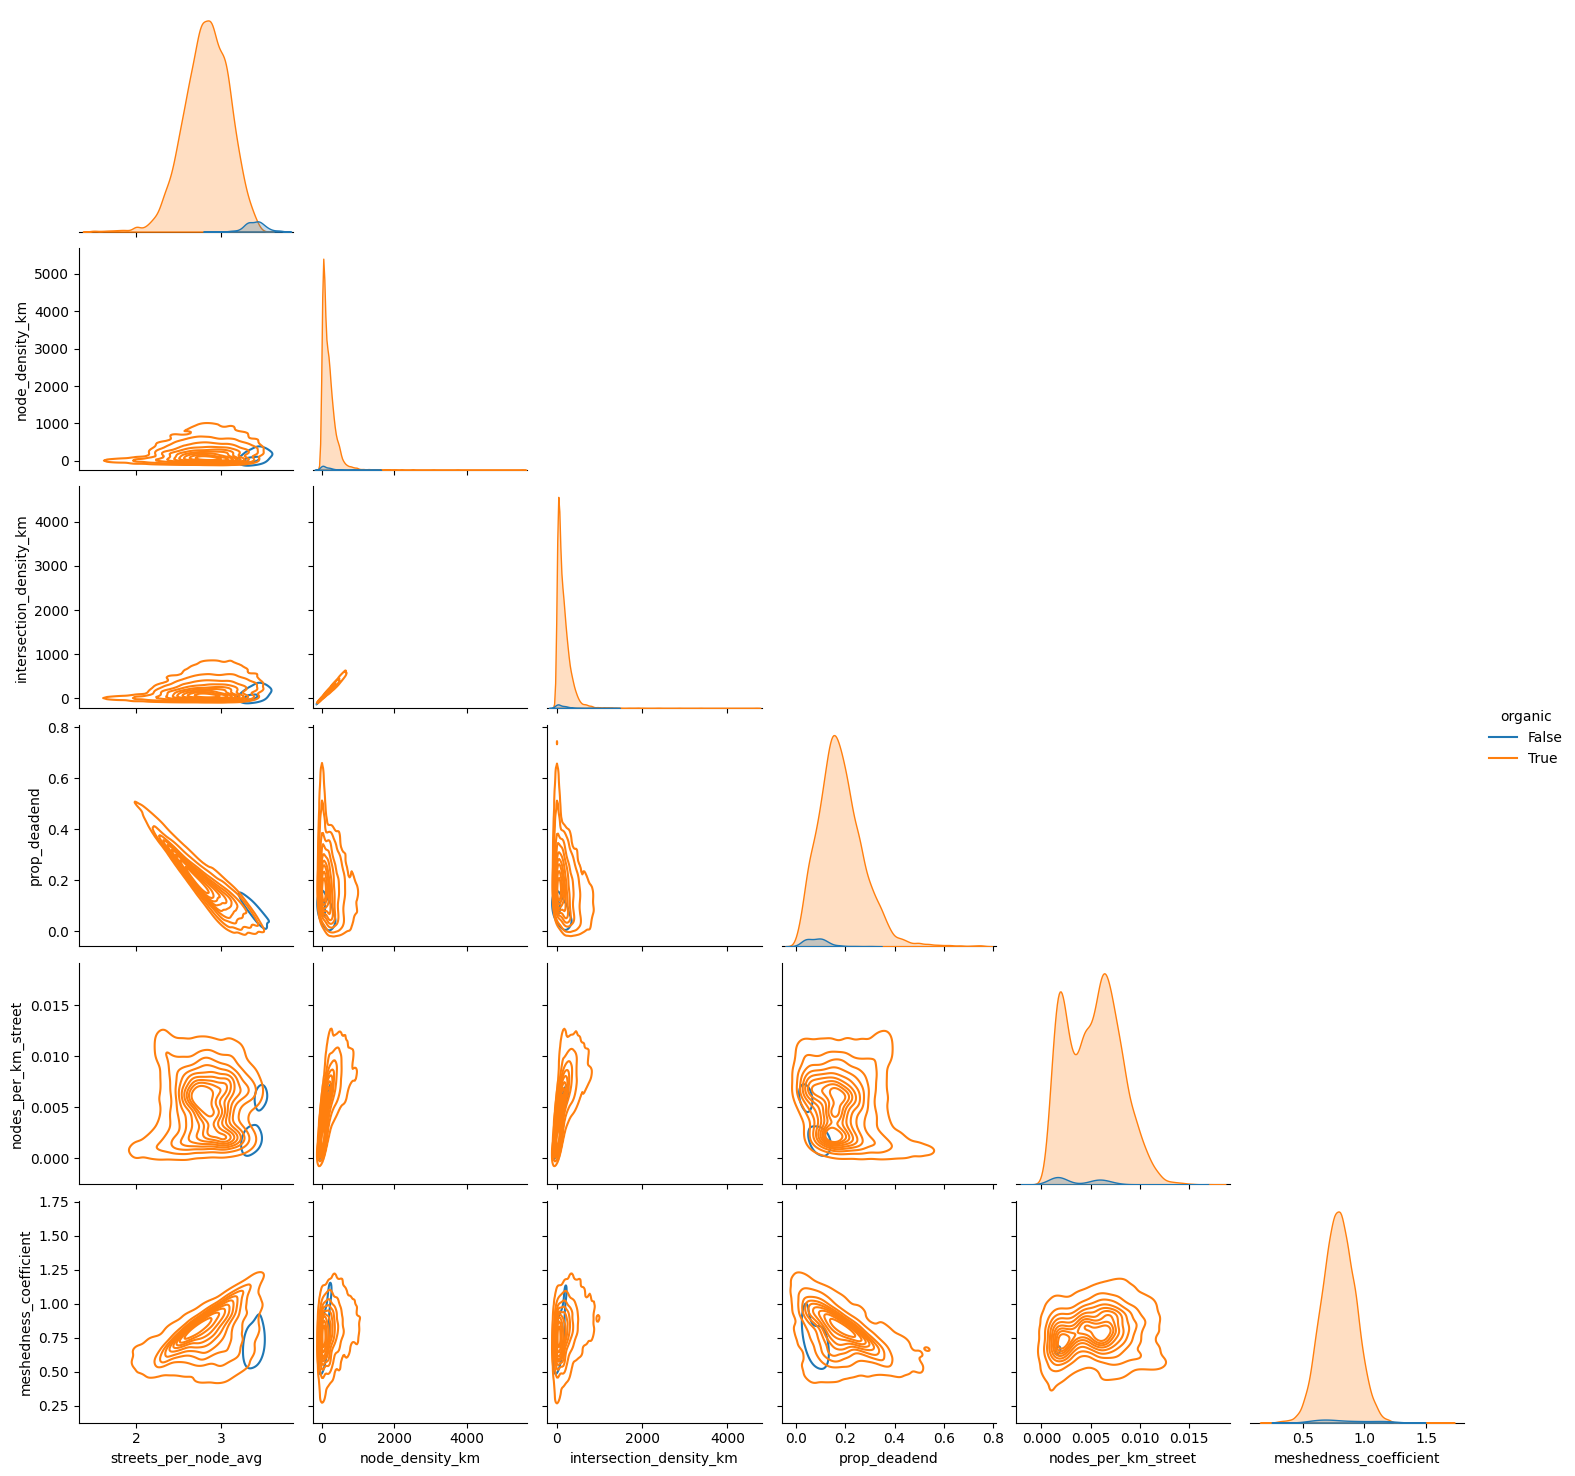

In [21]:
target_cols = ['streets_per_node_avg', 'node_density_km', 'intersection_density_km',
               'prop_deadend', 'nodes_per_km_street', 'meshedness_coefficient']
sns.pairplot(final_df[target_cols + ['organic']], corner=True, kind='kde', hue='organic', hue_order = [False, True])

Algumas observações:
- **streets_per_node_avg**: Já era de se esperar que as cidades que não são consideradas orgânicas tenham maior valor para essa *feature*. Entretanto, para todas as outras *features*, ainda existem cidades que são consideradas orgânicas e que possuem valor alto de **streets_per_node_avg**. Outra coisa interessante é que ao combinar essa *feature* com *nodes_per_km_street*, geramos dois grupos separados dentre as cidades não orgânicas.

## Correlação de Variáveis todas as regiões

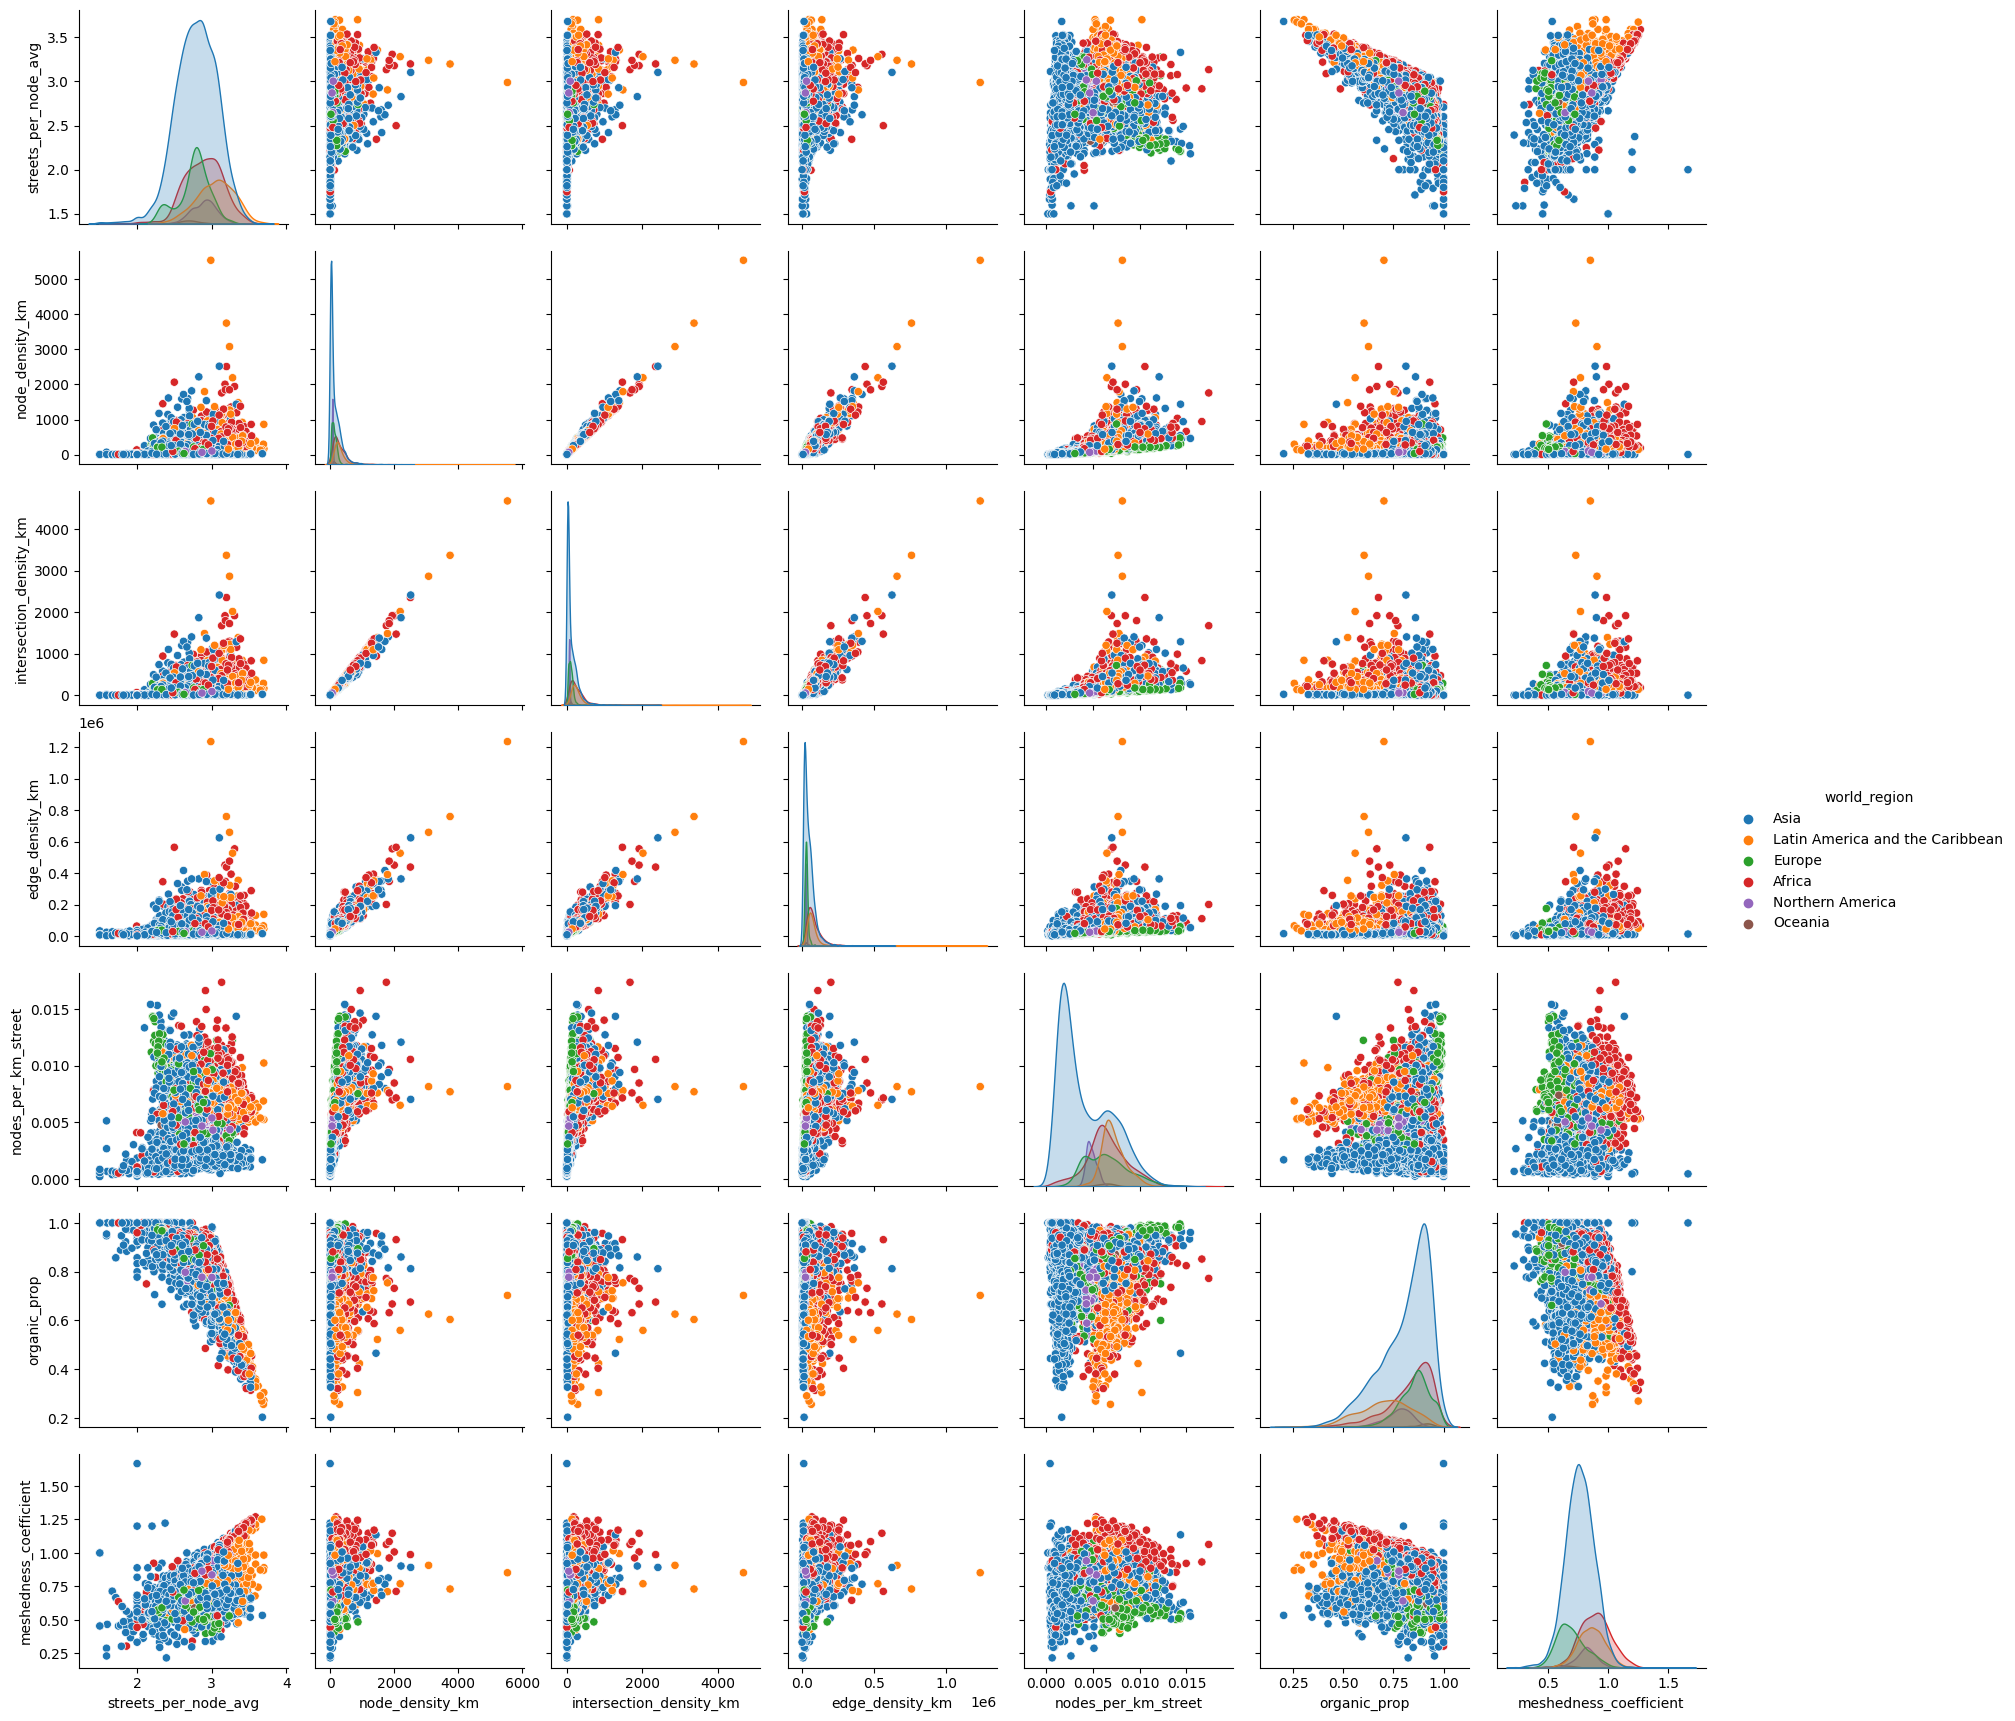

In [57]:
new_target_cols = [
    'streets_per_node_avg', 'node_density_km', 'intersection_density_km', 'edge_density_km',
    'nodes_per_km_street', 'organic_prop', 'meshedness_coefficient', 'world_region'
]
sns.pairplot(final_df[new_target_cols], hue='world_region')

## Dividindo dados por região

In [126]:
asian_cities = final_df[final_df['world_region'] == "Asia"]
latin_cities = final_df[final_df['world_region'] == "Latin America and the Caribbean"]
europe_cities = final_df[final_df['world_region'] == "Europe"]
north_america_cities = final_df[final_df['world_region'] == "Northern America"]
africa_cities = final_df[final_df['world_region'] == "Africa"]
oceania_cities = final_df[final_df['world_region'] == "Oceania"]

### Análise por região

In [127]:
def plot_corr(data:pd.DataFrame, cols_to_drop:list):
    corr = data.drop(cols_to_drop, axis=1).corr(numeric_only=True)

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [149]:
to_drop = ['6way_int_count', '6way_int_prop', '7way_int_count', '7way_int_prop',
           '8way_int_count', '8way_int_prop', '9way_int_count', '9way_int_prop',
           '10way_int_count', '10way_int_prop', '11way_int_count',
           '12way_int_count', '11way_int_prop', '12way_int_prop',
           '13way_int_count', '14way_int_count', '15way_int_count',
           '16way_int_count', '13way_int_prop', '14way_int_prop', '15way_int_prop',
           '16way_int_prop', '2way_int_count', '5way_int_prop', '1way_int_count',
           '3way_int_count', '4way_int_count', '5way_int_count', '2way_int_prop',
           'uc_id', 'elev_iqr', 'elev_median', 'elev_range', 'elev_std', 'grade_mean', 
           'grade_median']

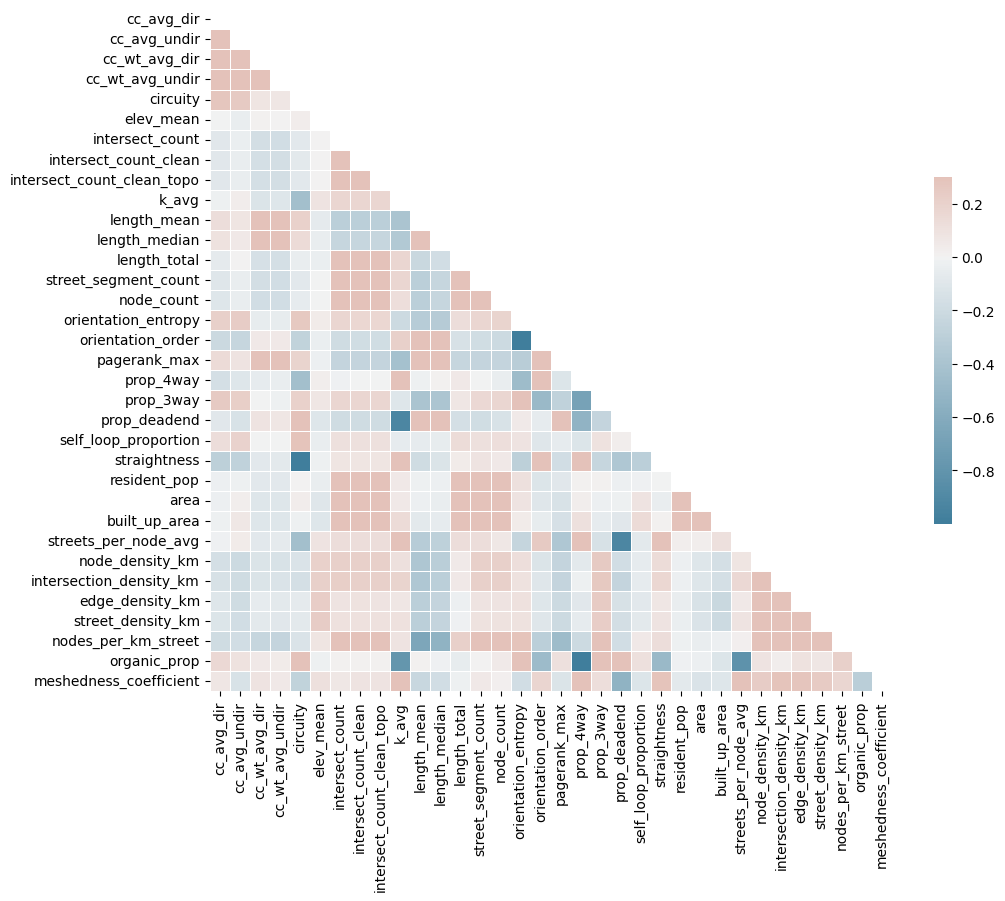

In [159]:
plot_corr(final_df, to_drop)

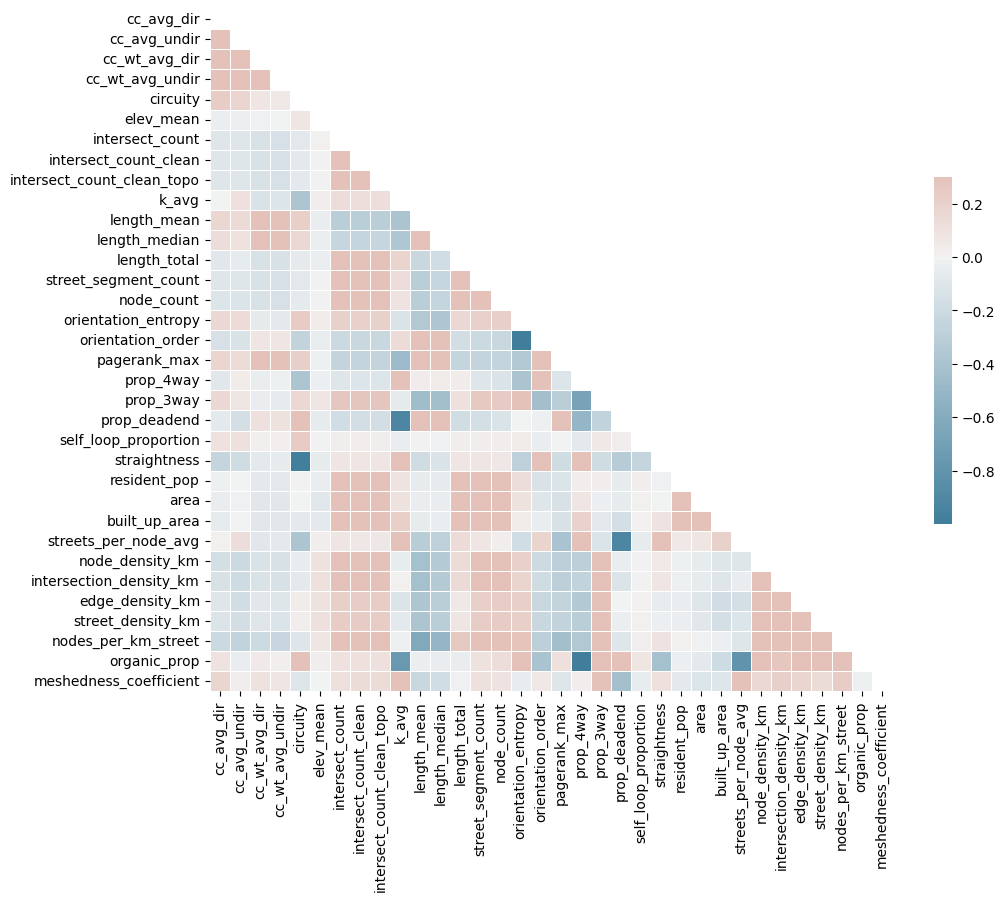

In [150]:
plot_corr(asian_cities, to_drop)

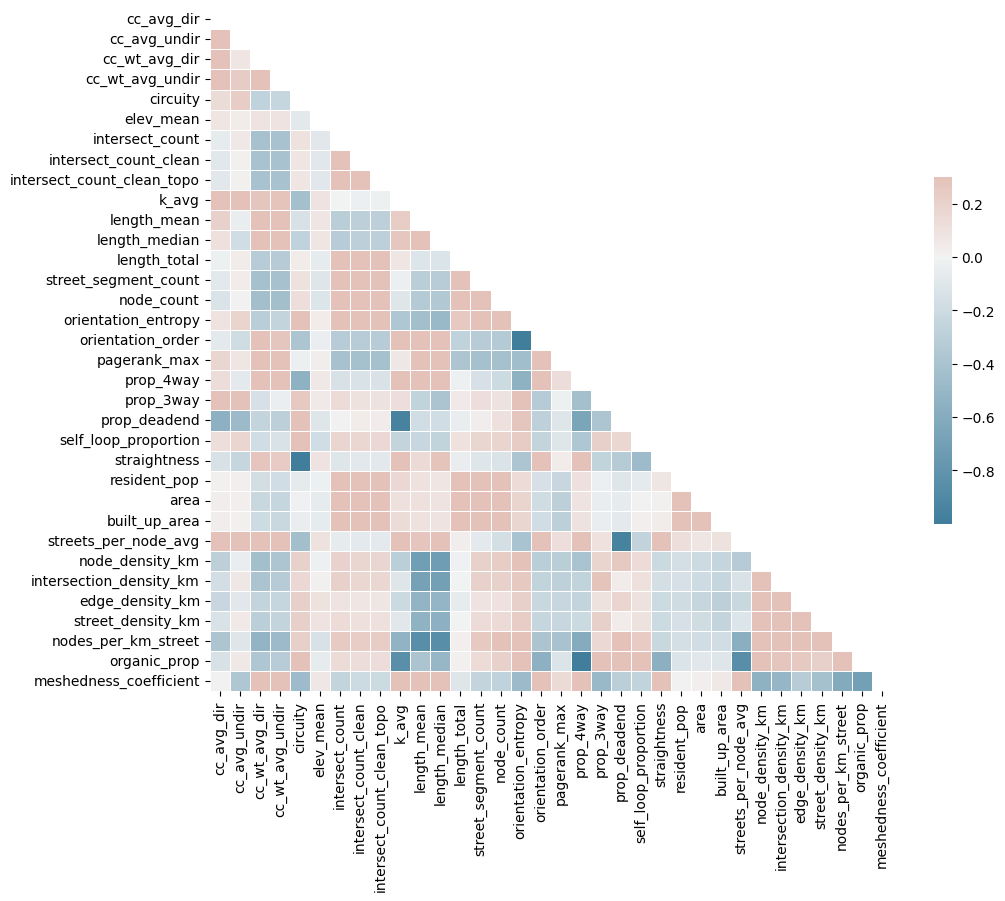

In [152]:
plot_corr(europe_cities, to_drop)

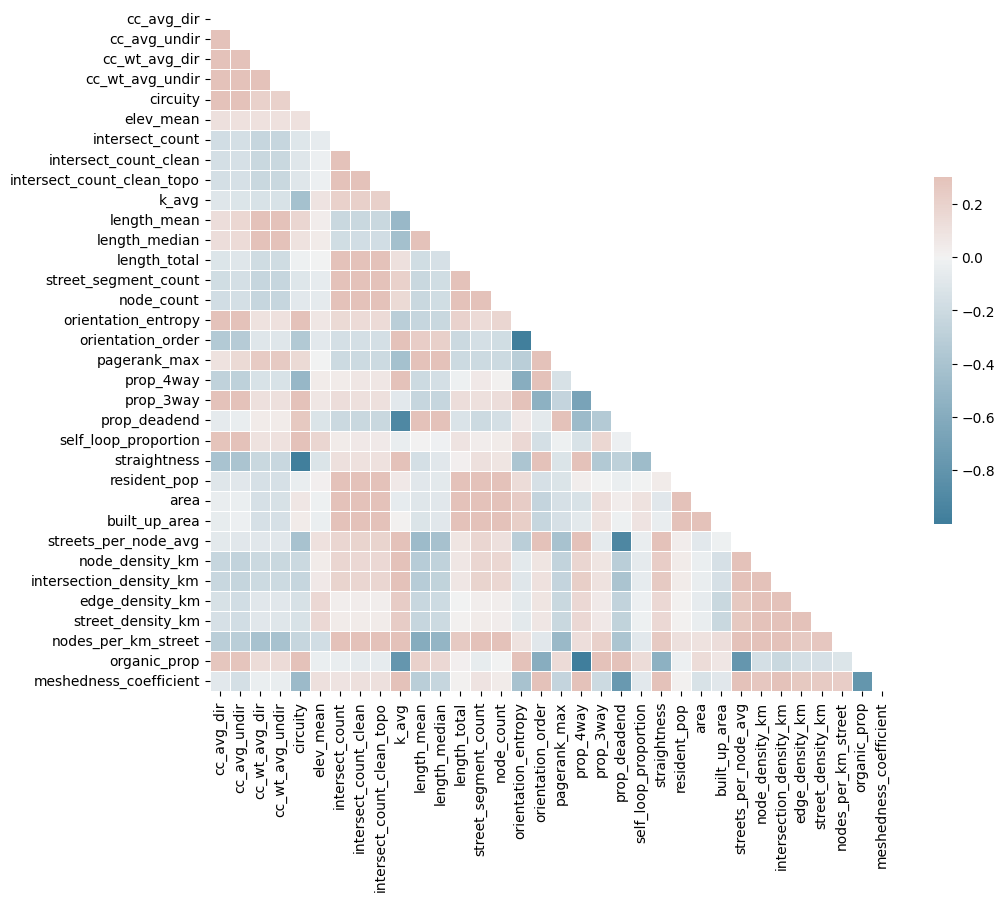

In [153]:
plot_corr(africa_cities, to_drop)

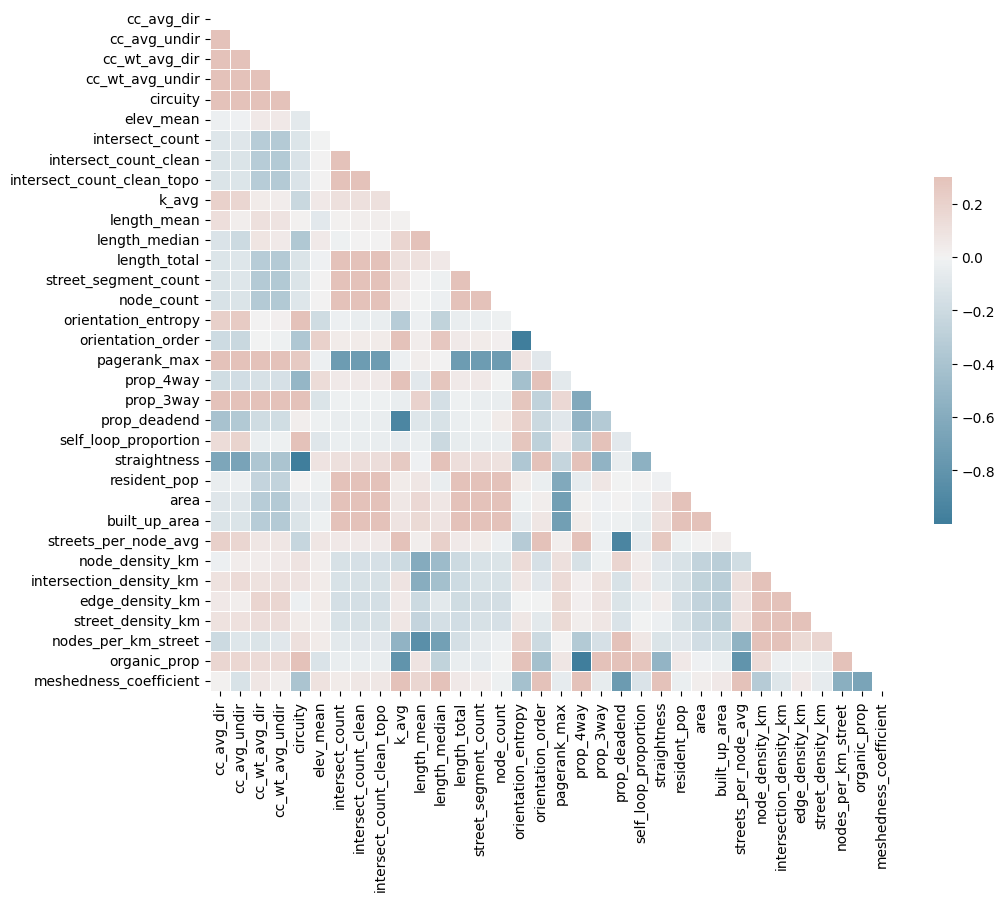

In [154]:
plot_corr(north_america_cities, to_drop)

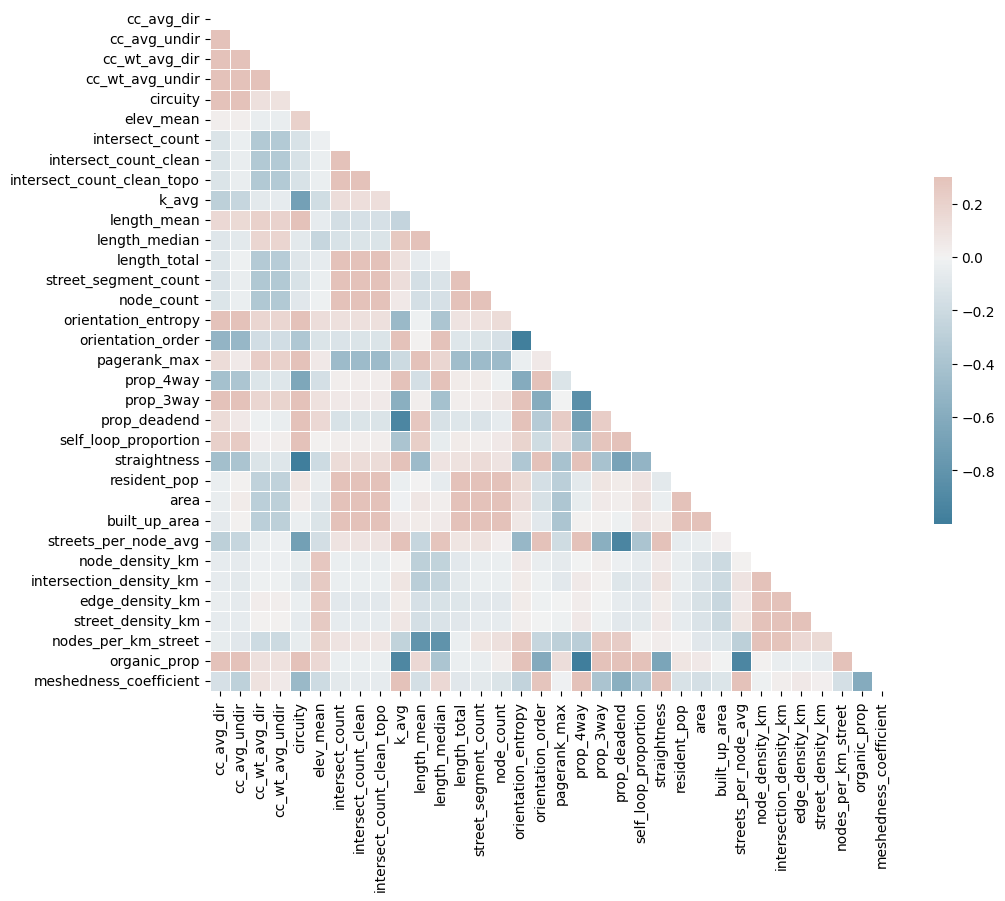

In [155]:
plot_corr(latin_cities, to_drop)

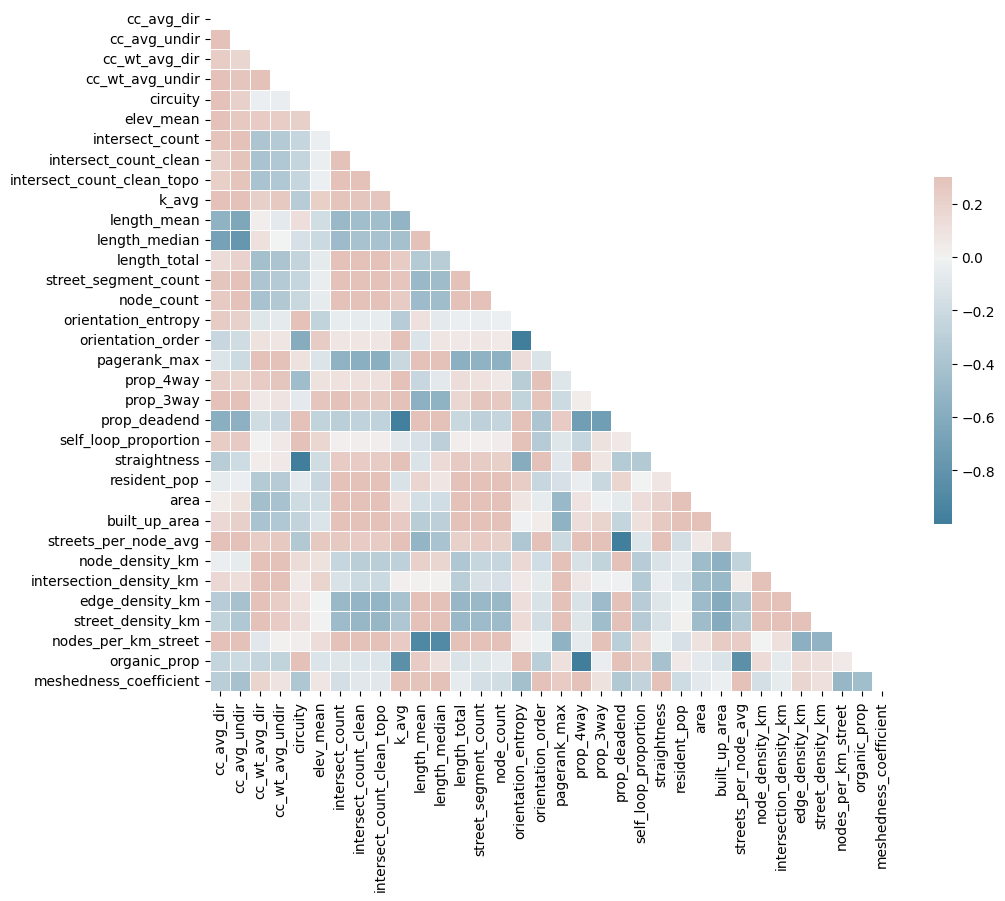

In [156]:
plot_corr(oceania_cities, to_drop)

## *organic_prop* por região

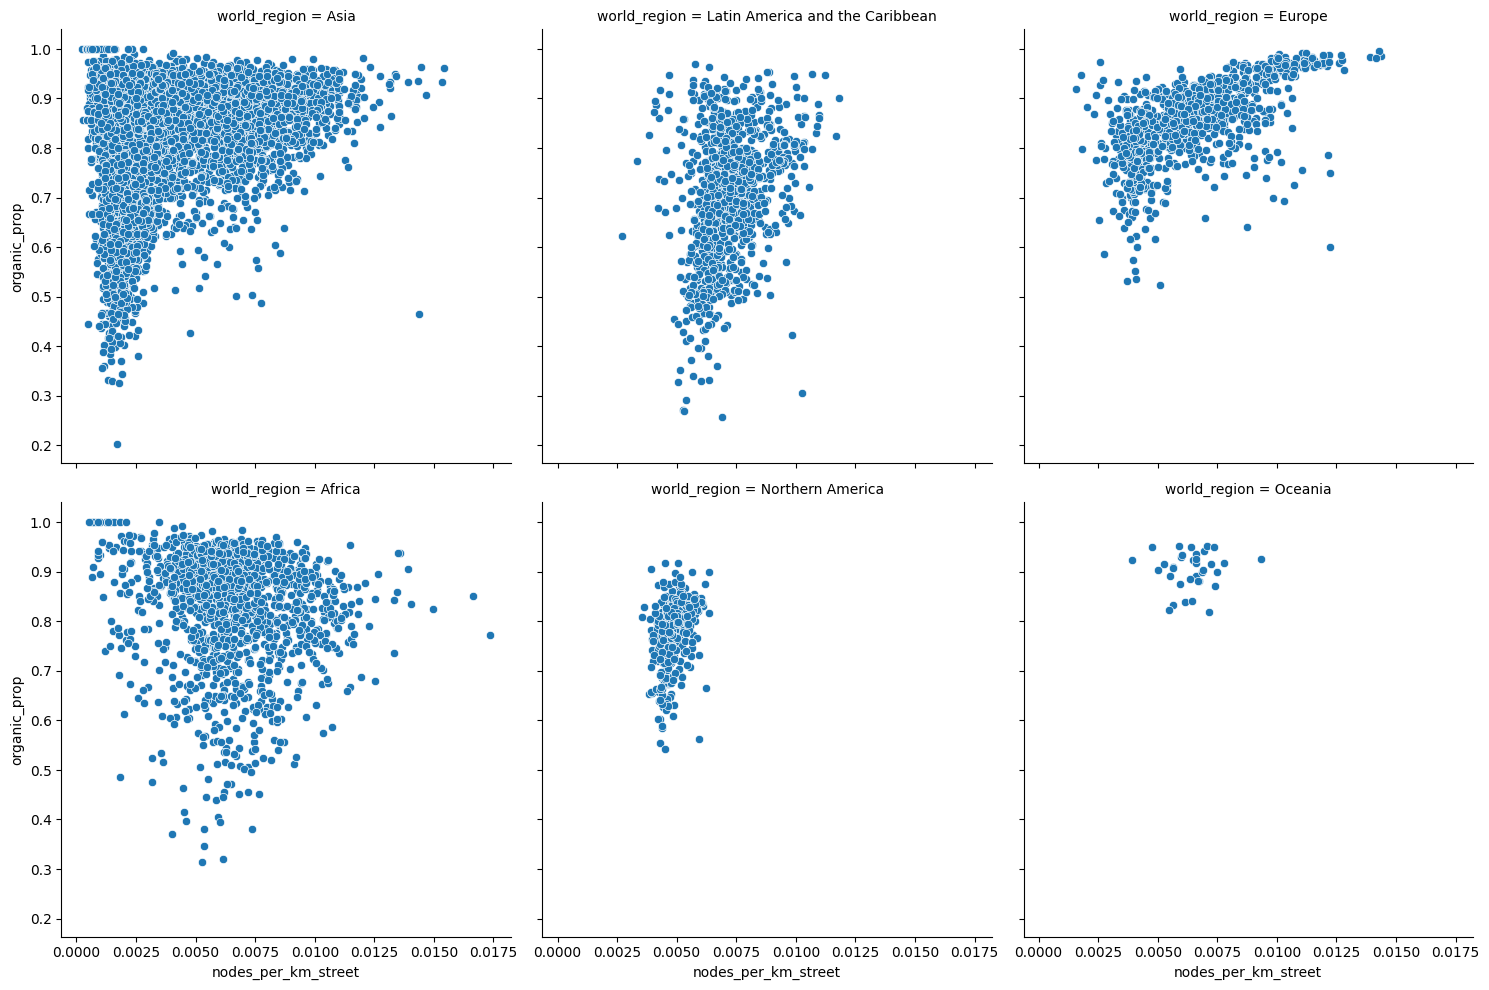

In [71]:
sns.relplot(data=final_df, x='nodes_per_km_street', y='organic_prop', col='world_region', col_wrap=3)

Com esse plot é possível ver que os "dois grupos" que aparentavam existir é devido a grande quantidade de cidades asiáticas com baixa proporção de nós por km em comparação com as outras regiões.

# Variáveis por região

## Ásia

In [76]:
asian_cities = final_df[final_df['world_region'] == "Asia"]

### *organic_prop* na ásia

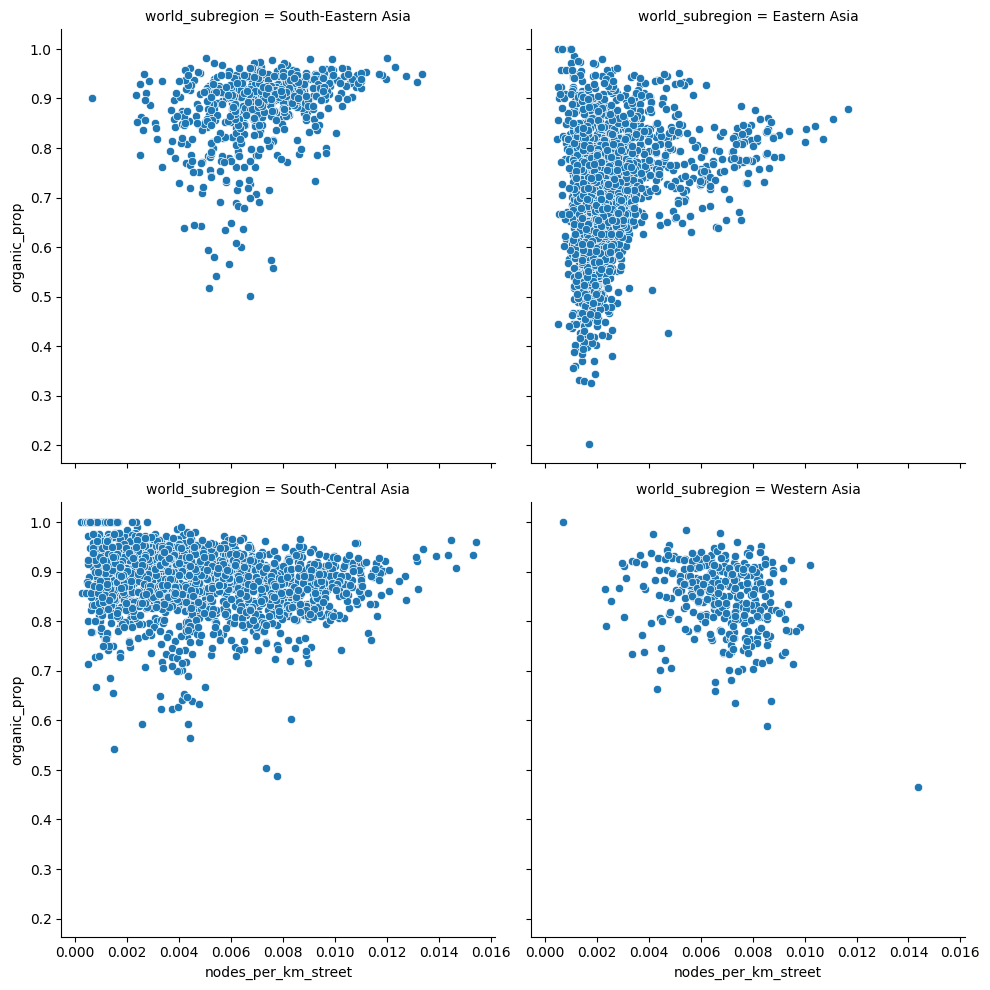

In [78]:
sns.relplot(data=asian_cities, x='nodes_per_km_street', y='organic_prop', col='world_subregion', col_wrap=2)

Para a Ásia, é possível ver cerca de 3 grupos diferentes: Grupo 1: Eastern Asia, Grupo 2: South-Central Asia e Grupo 3: Western Asia com South-Eastern Asia.

As cidades do Grupo 2 e Grupo 3 tem um maior valor de **organic_prop**. As do Grupo 2 tem uma grande variação de *nodes_per_km_street*, enquanto as do Grupo 3 possuem menos variação e tem uma média maior.

Já as cidades de Eastern Asia possuem uma variação de uma ponta a outra do *organic_prop*, mantendo uma baixa proporção de *nodes_per_km_street*.

No geral, pode-se pensar que ter menos nós por km de rua indica quarteirões maiores ou até mesmo cidades em regiões montanhosas que possuem ruas de maior comprimento sem muitas intersecções.

In [101]:
regional_target_cols1 = [
    'circuity', 'k_avg', 'streets_per_node_avg', 'prop_4way', 'prop_3way', 'node_density_km',
    'world_subregion'
]
regional_target_cols2 = [
    'intersection_density_km', 'edge_density_km', 'nodes_per_km_street', 'organic_prop', 'meshedness_coefficient',
    'world_subregion'
]

all_targets = ['circuity', 'k_avg', 'streets_per_node_avg', 'prop_4way', 'prop_3way', 'node_density_km',
               'intersection_density_km', 'edge_density_km', 'nodes_per_km_street', 'organic_prop', 'meshedness_coefficient',
               'straightness', 'prop_3way', 'built_up_area', 'node_count'
              ]

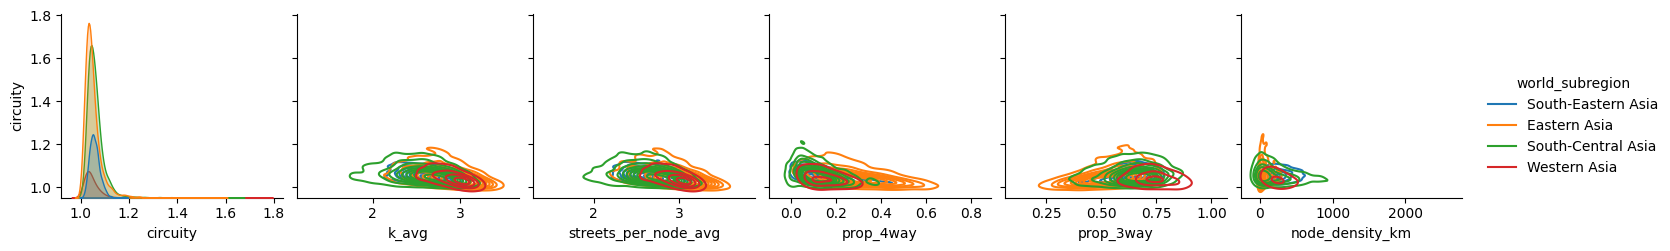

In [95]:
for col in regional_target_cols1[:1]:
    sns.pairplot(asian_cities[regional_target_cols1], hue='world_subregion', kind= 'kde', y_vars = [col])
#     sns.pairplot(asian_cities[regional_target_cols2], hue='world_subregion', kind= 'kde', y_vars = [col])

<AxesSubplot: >

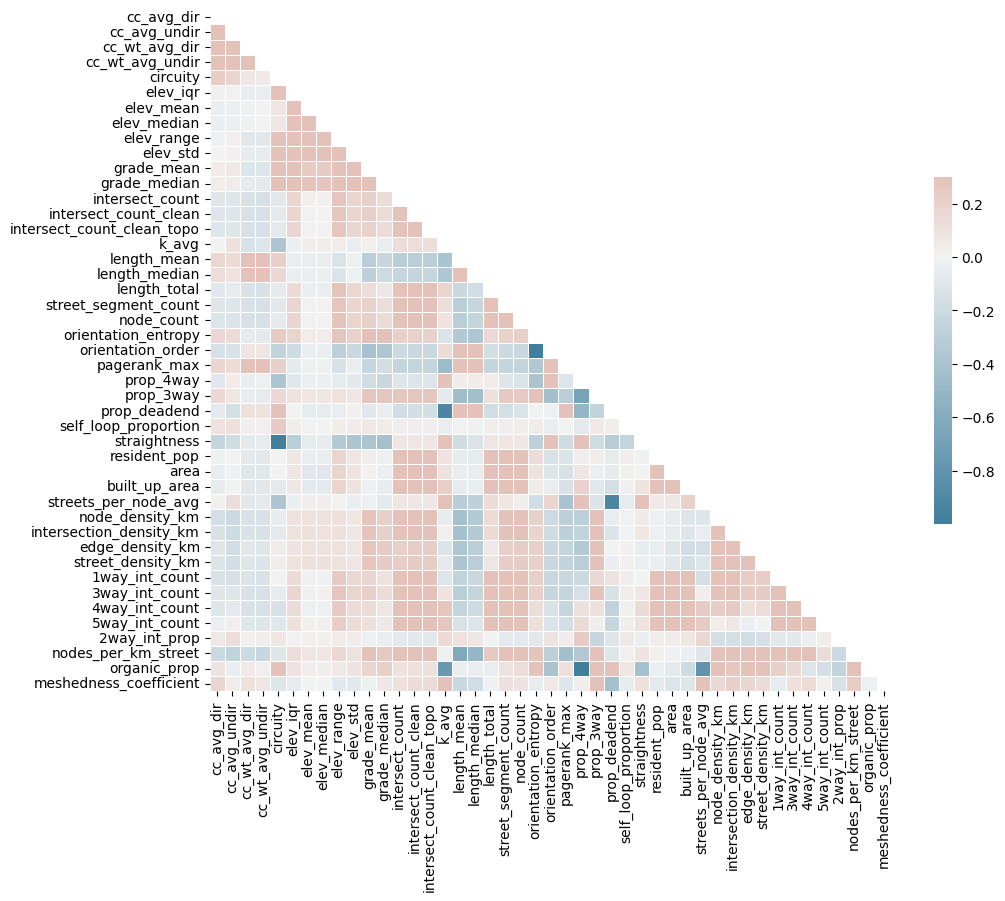